In [ ]:
# Install ipympl:
!pip install ipympl
!pip install ipython

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

#Plotting and Visualizations
import matplotlib.pyplot as plt
#Enable the ipympl backend in your notebook
%matplotlib widget
    
import seaborn as sns
sns.set()

import sympy as sp
#from IPython.display import HTML, display, Math

In [3]:
import platform
print(f"Python version: {platform.python_version()}")
print(f"numpy version: {np.__version__}")
print(f"panda version: {pd.__version__}")
print(f"seaborn version: {sns.__version__}")
import matplotlib
print(f"matplotlib version: {matplotlib.__version__}")

print(f"SymPy version: {sp.__version__}")

Python version: 3.10.14
numpy version: 1.26.4
panda version: 2.2.1
seaborn version: 0.13.2
matplotlib version: 3.7.5
SymPy version: 1.12


## Plotting Phase Space Diagram

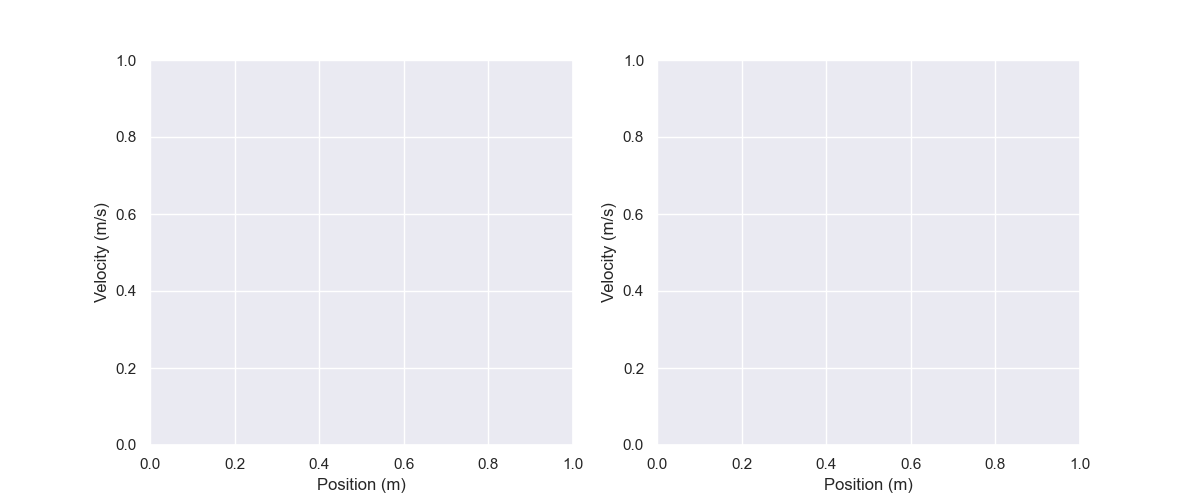

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
mass = 1.0  # Mass (kg)
k_values = [1.0, 4.0, 9.0]  # Spring constants (N/m)
x0_values = [1.0, 1.5, 2.0]  # Initial positions (m)
v0 = 0.0  # Initial velocity (m/s)
t_vals = np.linspace(0, 20, 500)  # Time array

# Function to compute SHM position and velocity for given omega and initial conditions
def shm_motion(omega, x0, v0, t):
    A = np.sqrt(x0**2 + (v0 / omega)**2)
    phi = np.arctan2(v0 / omega, x0)
    x = A * np.cos(omega * t + phi)
    v = -A * omega * np.sin(omega * t + phi)
    return x, v

# Set up the figure and axis
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

def update_plot_titles(axs, omega, x0):
    axs[0].set_title(f"Phase-Space Diagram Varying $\omega = {omega}$")
    axs[1].set_title(f"Phase-Space Diagram Varying Initial $x_0 = {x0}$")

for ax in axs:
    ax.set_xlabel("Position (m)")
    ax.set_ylabel("Velocity (m/s)")
    ax.grid(True)

# Animation function
def animate(i):
    axs[0].clear()
    axs[1].clear()
    
    omega = np.sqrt(k_values[i % len(k_values)] / mass)
    x, v = shm_motion(omega, x0_values[0], v0, t_vals)
    axs[0].plot(x, v)
    axs[0].set_xlim(-2, 2)
    axs[0].set_ylim(-5, 5)
    axs[0].axhline(0, color='black', linewidth=0.5)
    axs[0].axvline(0, color='black', linewidth=0.5)

    x0 = x0_values[i % len(x0_values)]
    omega_fixed = np.sqrt(k_values[0] / mass)
    x, v = shm_motion(omega_fixed, x0, v0, t_vals)
    axs[1].plot(x, v)
    axs[1].set_xlim(-2, 2)
    axs[1].set_ylim(-2, 2)
    axs[1].axhline(0, color='black', linewidth=0.5)
    axs[1].axvline(0, color='black', linewidth=0.5)
    
    update_plot_titles(axs, omega, x0)

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=max(len(k_values), len(x0_values)), interval=1000, repeat=True)
plt.show()

# Display the animation
#plt.close(fig)  # Close static figure to prevent duplicate display
#HTML(ani.to_jshtml())

# save as animation GIF file
#ani.save('linearSHO_phase-space.gif', writer=PillowWriter(fps=3))